# Visualising GPX data in Python

First we need to load all the packages, import the data and covert it into a pandas DataFrame.

In [1]:
import gpxpy
import numpy as np
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import seaborn as sns
import seawater as sw


# Import data
gpx = gpxpy.parse(open('/home/sh16450/Downloads/Getting_attacked_by_British_drivers.gpx'))

print("{} track(s)".format(len(gpx.tracks)))
track = gpx.tracks[0]
print("{} segment(s)".format(len(track.segments)))
segment = track.segments[0]
print("{} point(s)".format(len(segment.points)))

data = []
segment_length = segment.length_3d()
for point_idx, point in enumerate(segment.points):
    data.append([point.longitude, point.latitude,
                 point.elevation, point.time, segment.get_speed(point_idx)])

columns = ['Longitude', 'Latitude', 'Altitude', 'Time', 'Speed']
df = pd.DataFrame(data, columns=columns)
df.head()

1 track(s)
1 segment(s)
9876 point(s)


,Longitude,Latitude,Altitude,Time,Speed
0,-3.517262,50.721712,45.2,2018-01-28 10:19:56,NaN
1,-3.517270,50.721741,45.2,2018-01-28 10:19:58,1.276335
2,-3.517300,50.721714,45.2,2018-01-28 10:20:02,0.613369
3,-3.517344,50.721714,45.3,2018-01-28 10:20:12,0.257696
4,-3.517361,50.721669,45.4,2018-01-28 10:20:37,0.947626


## Smoothing

Because GPX data from a smartphone can be a bit noisy, it is better to smooth the data, e.g. with a rolling mean.

In [2]:
# SMOOTHING
df_new = df[['Longitude', 'Latitude', 'Altitude', 'Speed']].rolling(window=5, min_periods=1, center=True).mean()
df_new['Time'] = df['Time']
# smoothed total of climbs
alt_tot = df_new['Altitude'].diff()[df_new['Altitude'].diff() > 0.0].sum()
print("We've climbed {} m today!".format(round(alt_tot)))

We've climbed 611.0 m today!


## Visualising the data

After extaction and smoothing, it's time to plot the data using the mplleaflet package on a nice, zoomable map.

In [3]:
# Visualize the data
fig, ax = plt.subplots(figsize=(16,9))
df = df.dropna()
ax.plot(df_new['Longitude'], df_new['Latitude'],
        color='darkblue', linewidth=6, alpha=0.7)
mplleaflet.display(fig=fig)

### Analysis of speed and height
Visualise the heigh profile of the ride and print the total amount of meter climbed and the distribution of our speed, plus the maximum speed.

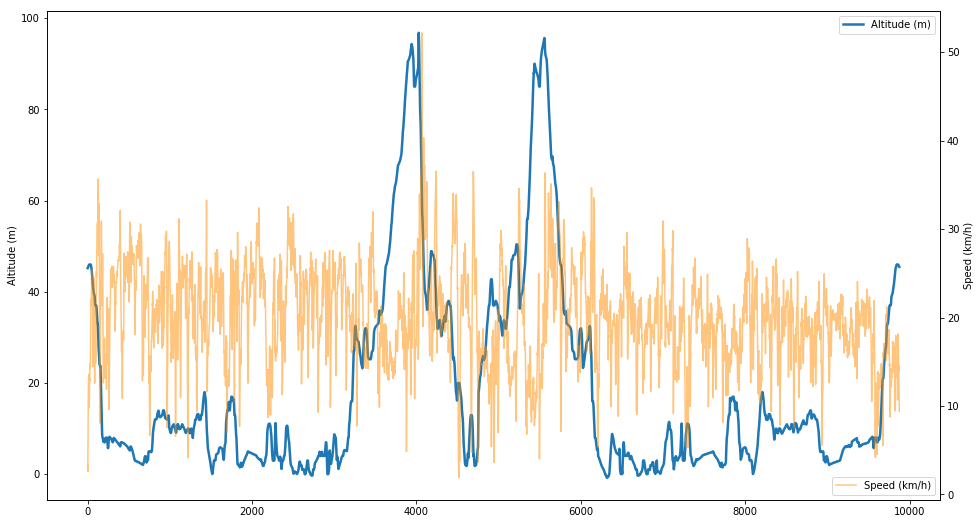

In [4]:
fig, ax = plt.subplots(figsize=(16,9))
# Create second y-axis with shared x-axis
ax1 = ax.twinx()
# Plot the data
ax.plot(df_new['Altitude'], lw=2.5,label='Altitude (m)')
ax1.plot(df_new['Speed'] * 3.6, color = 'darkorange',alpha=0.5, label = 'Speed (km/h)')
ax.set_ylabel('Altitude (m)')
ax1.set_ylabel('Speed (km/h)')
# Make the legend
ax.legend(loc=1)
ax1.legend(loc='lower right')

In [5]:
print('Maximum Speed: {} km/h'.format(round(max(df_new['Speed'] *3.6))))
print('Average Speed: {} km/h'.format(round((df_new['Speed'].mean() * 3.6))))
print('Heighest Point {} m'.format(round(max(df_new['Altitude']))))
print('Lowest Point {} m'.format(round(min(df_new['Altitude']))))


Maximum Speed: 52 km/h
Average Speed: 20 km/h
Heighest Point 97 m
Lowest Point -1 m


Plot the statistical distribution of our speed.

Text(0.5,0,'Speed (km/h)')

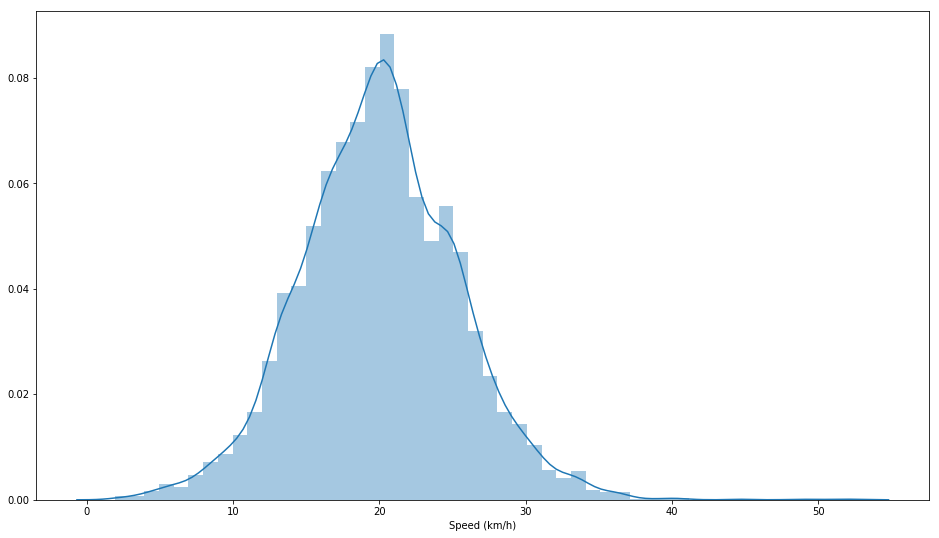

In [6]:
fig, ax = plt.subplots(figsize=(16,9))
sns.distplot(df_new.Speed*3.6)
ax.set_xlabel('Speed (km/h)')

## Extract time in a specified lat/lon box

In [7]:
def time_at_place(df_new, east=-3.408, west=-3.423, north=50.6164, south=50.612):

    times_at_place = df_new['Time'].loc[(df_new['Latitude'] <= north) & (df_new['Latitude'] >= south) &
                                        (df_new['Longitude'] <= east) & (df_new['Longitude'] >= west)]
    return times_at_place

times = pd.DataFrame(time_at_place(df_new))

In [8]:
times.tail(15)

,Time
6487,2018-01-28 13:47:16
6488,2018-01-28 13:47:17
6489,2018-01-28 13:47:18
6490,2018-01-28 13:47:19
6491,2018-01-28 13:47:20
6492,2018-01-28 13:47:21
6493,2018-01-28 13:47:22
6494,2018-01-28 13:47:23
6495,2018-01-28 13:47:24
6496,2018-01-28 13:47:25
